In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'F:\Fingertips\python\train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# independent features
x = df.drop('label', axis=1)

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
# dependent feature
y = df['label']

In [7]:
y.head()


0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
#text preprocessing
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
df = df.dropna()

In [10]:
message = df.copy()

In [11]:
message.reset_index(inplace=True)

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus= []

for i in range(len(message)):
        review = re.sub('[^a-zA-z]', ' ', message['title'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
        

In [18]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic [photos]',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hi

In [16]:
#applying countvectorrize
# creating bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [17]:
x = cv.fit_transform(corpus).toarray()

In [19]:
y = message['label']

In [20]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [21]:
#train - test
from sklearn.model_selection import train_test_split


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [24]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [27]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import matplotlib.pyplot as plt

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
# multinomial naive-bayes algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
import numpy as np
import itertools

In [36]:
from sklearn import metrics
import numpy as np
import itertools

In [38]:
classifier.fit(x_train, y_train)

MultinomialNB()

accuracy: 0.902
Confusion matrix, without normalization


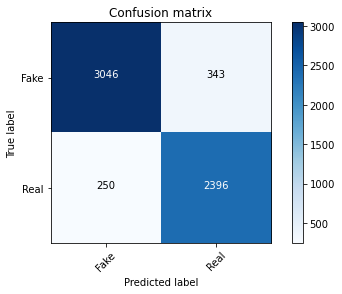

In [39]:
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [47]:
# Passive aggressive classifier algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50)

In [48]:
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy: 0.917
Confusion matrix, without normalization


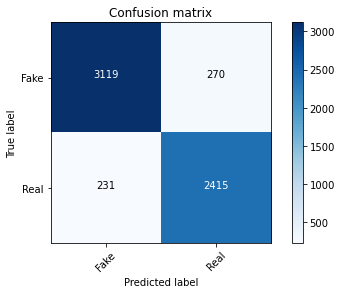

In [49]:
pred = pac.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])

### BoW model using Tf-Idf model

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = TfidfVectorizer()
X = xy.fit_transform(corpus).toarray()

In [53]:
Y = message['label']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=0)


In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [56]:
# Apply MultinominalNB model
classifier.fit(X_train, Y_train)

MultinomialNB()

accuracy: 0.844
Confusion matrix, without normalization


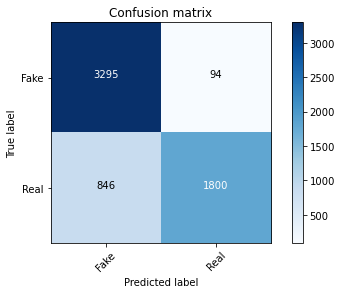

In [58]:
Pred = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test,Pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(Y_test, Pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [59]:
# Apply Passive aggressive classifier algorithm
pac.fit(X_train, Y_train)

PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy: 0.921
Confusion matrix, without normalization


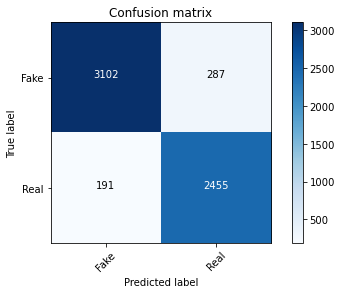

In [60]:
Pred = pac.predict(X_test)
score = metrics.accuracy_score(Y_test,Pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(Y_test, Pred)
plot_confusion_matrix(cm, classes=['Fake','Real'])